**Name: Xijing Wang(Thomas)<br>**
**Student ID: 1601742<br>**
**CourseNum: CSCI 184<br>**
**HW1<br>**


In [3]:
#Package&Library
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.tree import DecisionTreeClassifier,  plot_tree
from collections import defaultdict

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


**Problem A**

train average acc =  0.9048387096774192
test average acc =  0.8407407407407408


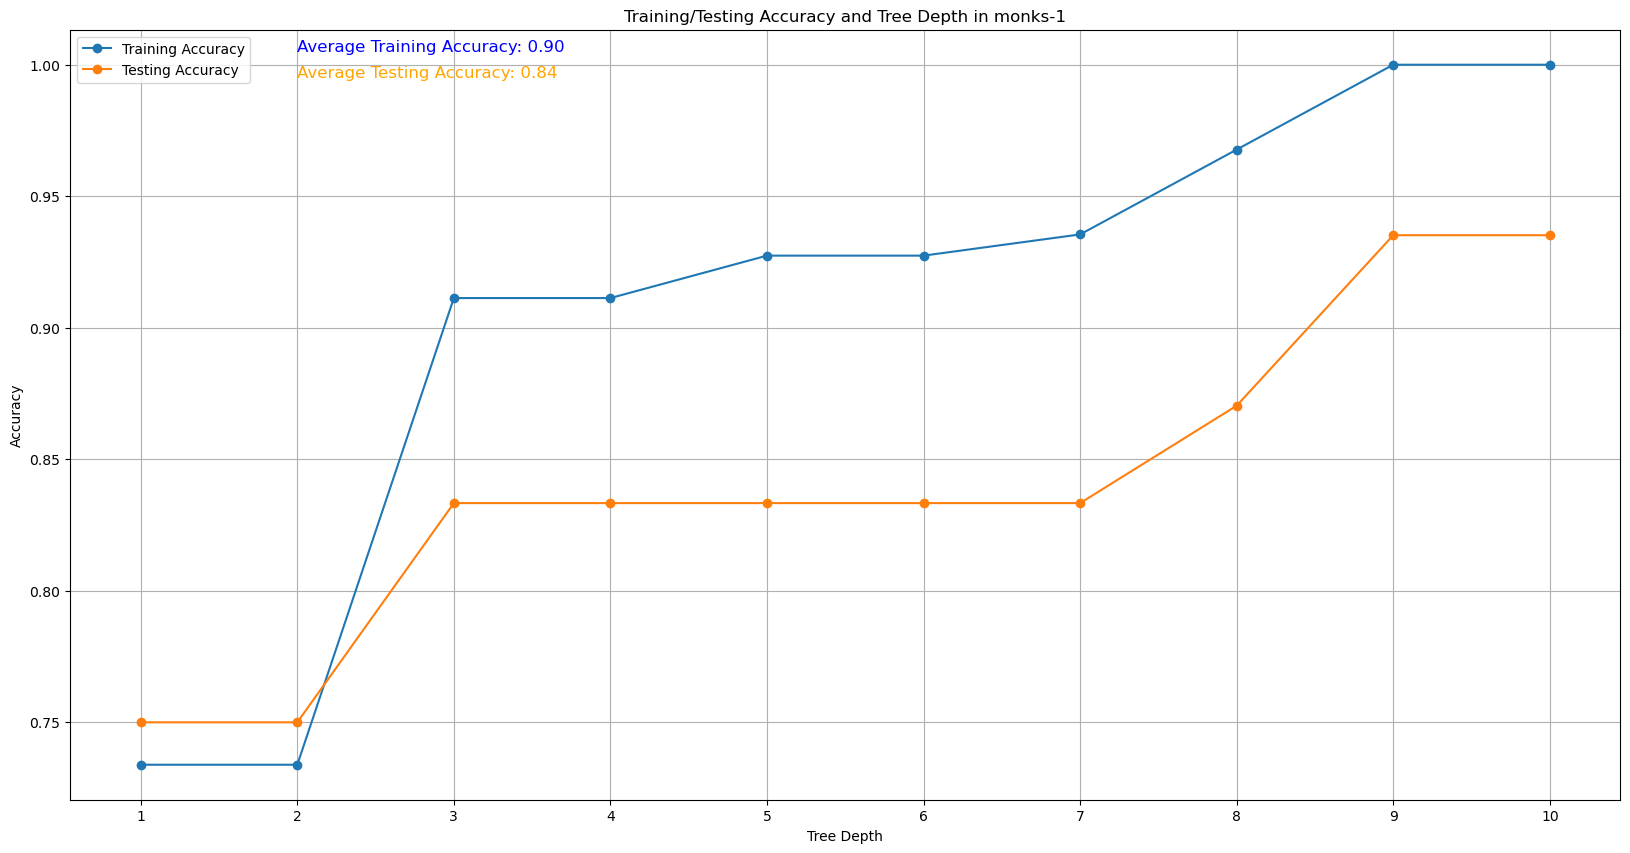

train average acc =  0.8177514792899409
test average acc =  0.725


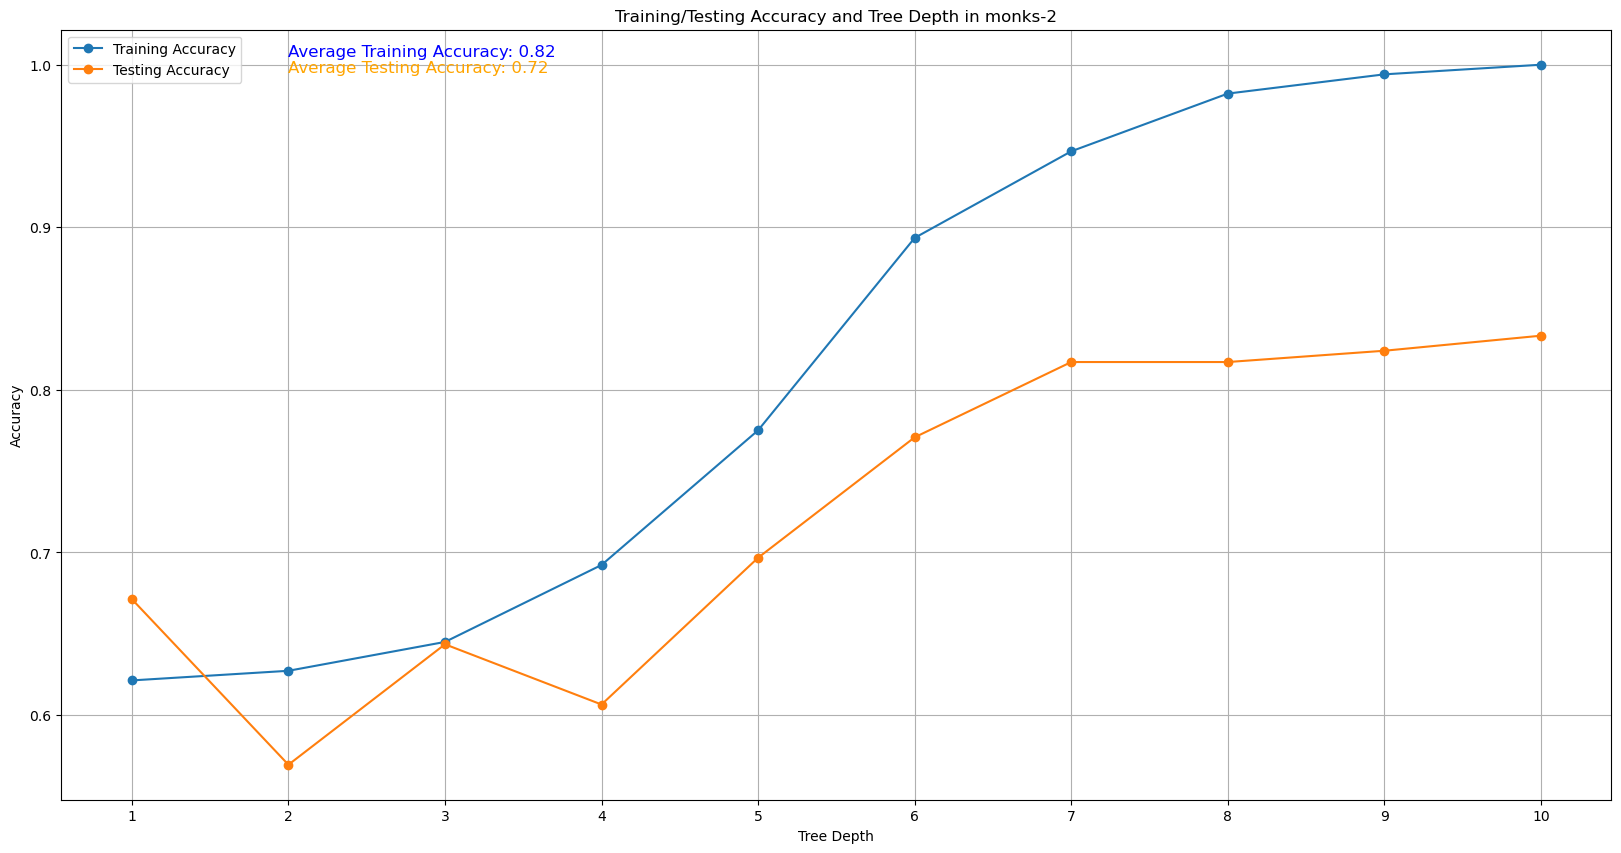

train average acc =  0.9524590163934427
test average acc =  0.9097222222222223


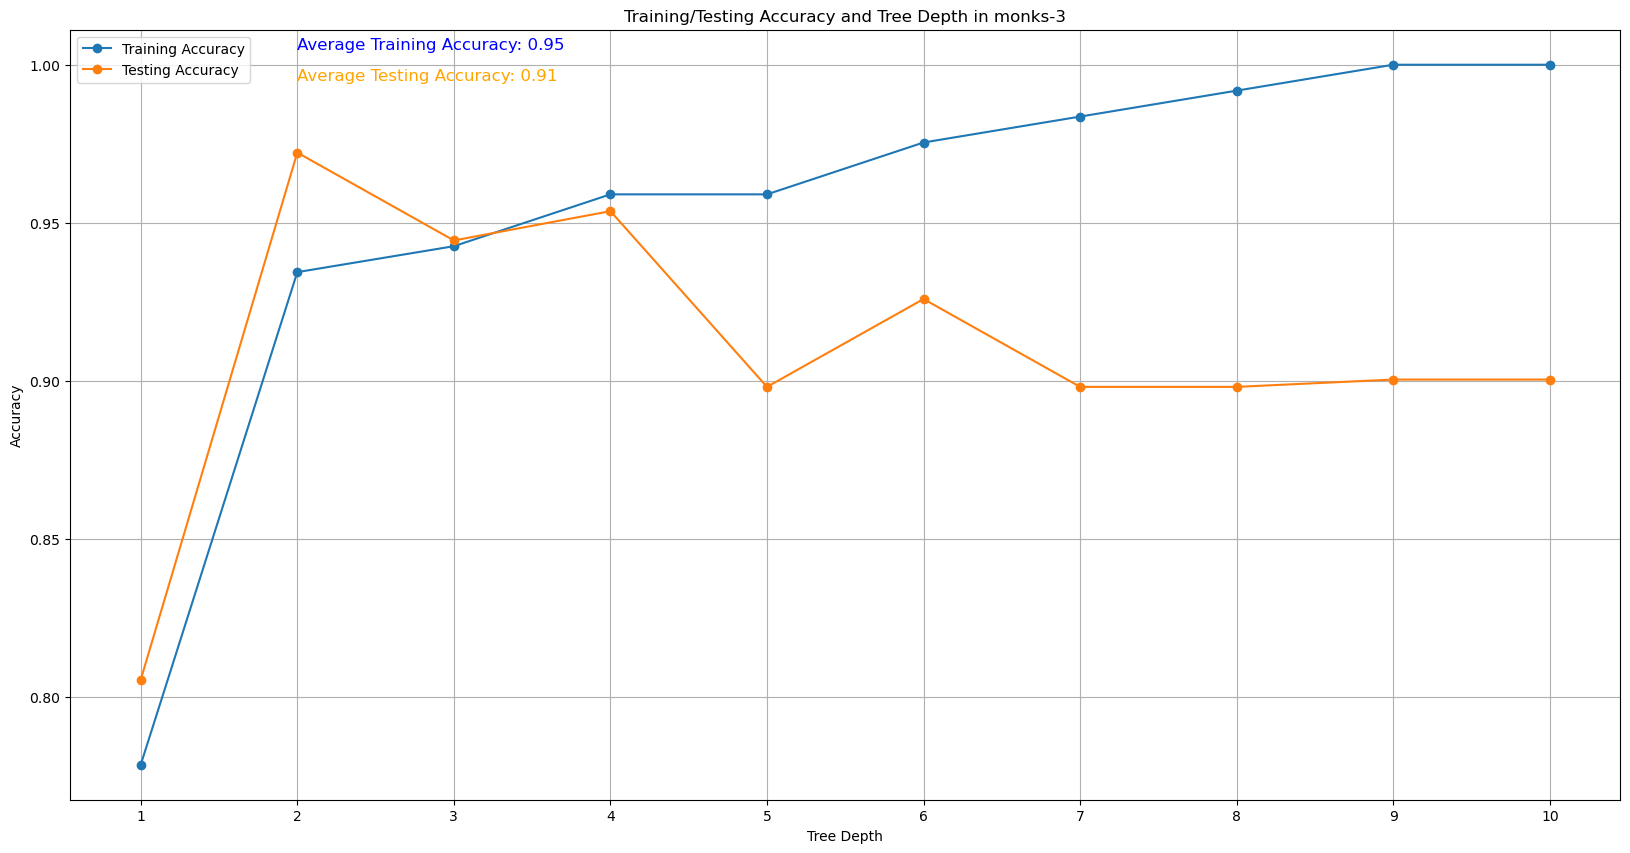

In [4]:
#data loading
total_files = ["monks-1", "monks-2", "monks-3"]
train_acc = defaultdict(list)
test_acc = defaultdict(list)
train_avg_acc = defaultdict(int)
test_avg_acc = defaultdict(int)

for file in total_files:

    monk1train_data = pd.read_csv(f"./monks_data/{file}.train", header=None)
    yt = monk1train_data.iloc[:, 0]
    xt = monk1train_data.iloc[:, 1:]
    monk1test_data = pd.read_csv(f"./monks_data/{file}.test", header=None)
    ytt = monk1test_data.iloc[:, 0]
    xtt = monk1test_data.iloc[:, 1:]

    d = range(1, 11)
    for i in d:
        dt = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=1)
        dt.fit(xt,yt)

        yt_p = dt.predict(xt)
        temp = accuracy_score(yt,yt_p)
        train_acc[file].append(temp)
        
        
        ytt_p = dt.predict(xtt)
        temp = accuracy_score(ytt,ytt_p)
        test_acc[file].append(temp)
        
    train_avg_acc[file] = np.mean(train_acc[file])
    test_avg_acc[file] = np.mean(test_acc[file])

    print("train average acc = ", train_avg_acc[file])
    print("test average acc = ", test_avg_acc[file])
    plt.figure(figsize=(20,10))
    plt.plot(d,train_acc[file],label='Training Accuracy', marker='o')
    plt.plot(d,test_acc[file],label='Testing Accuracy', marker='o')
    plt.xlabel('Tree Depth')
    plt.ylabel('Accuracy')
    plt.title(f'Training/Testing Accuracy and Tree Depth in {file}')
    plt.xticks(d)
    plt.legend()
    plt.grid(True)
    plt.text(2,1.005,f'Average Training Accuracy: {train_avg_acc[file]:.2f}', fontsize=12, color='blue')
    plt.text(2,0.995,f'Average Testing Accuracy: {test_avg_acc[file]:.2f}', fontsize=12, color='orange')
    plt.show()

**Problem B**

In [5]:
monk1_train = pd.read_csv('./monks_data/monks-1.train',header=None)
monk1_test = pd.read_csv('./monks_data/monks-1.test',header=None)

yt = monk1_train.iloc[:, 0] 
xt = monk1_train.iloc[:, 1:]  

ytt = monk1_test.iloc[:, 0] 
xtt = monk1_test.iloc[:, 1:]  


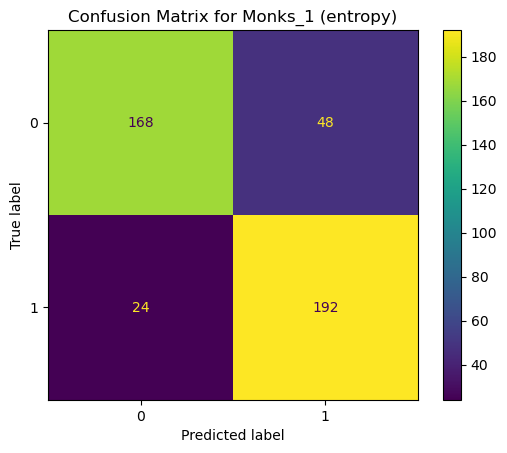

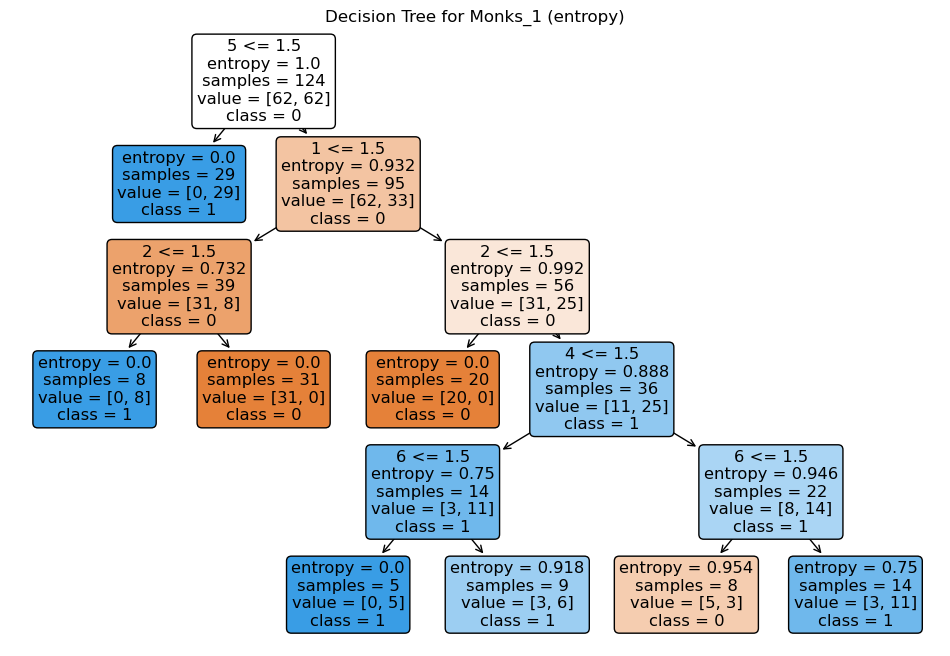

In [6]:
dt_1 =DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)
dt_1.fit(xt,yt)

ytt_p = dt_1.predict(xtt)

c_matrix = confusion_matrix(ytt,ytt_p)
temp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=dt_1.classes_)
temp.plot()
plt.title('Confusion Matrix for Monks_1 (entropy)')
plt.show()

# Visualize the decision tree
plt.figure(figsize=(12, 8))  # Adjust the size as needed
plot_tree(dt_1, filled=True, feature_names=xt.columns, class_names=[str(cls) for cls in dt_1.classes_], rounded=True)
plt.title('Decision Tree for Monks_1 (entropy)')
plt.show()

**Problem C**

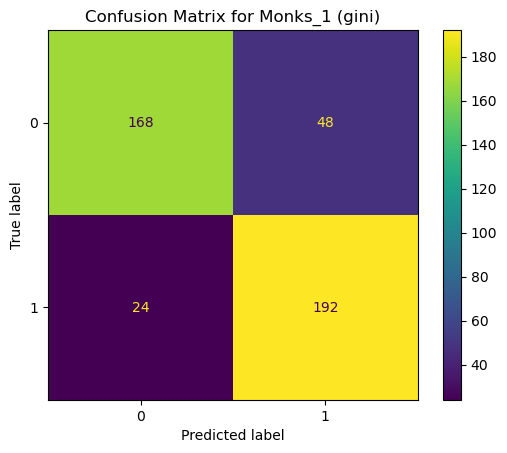

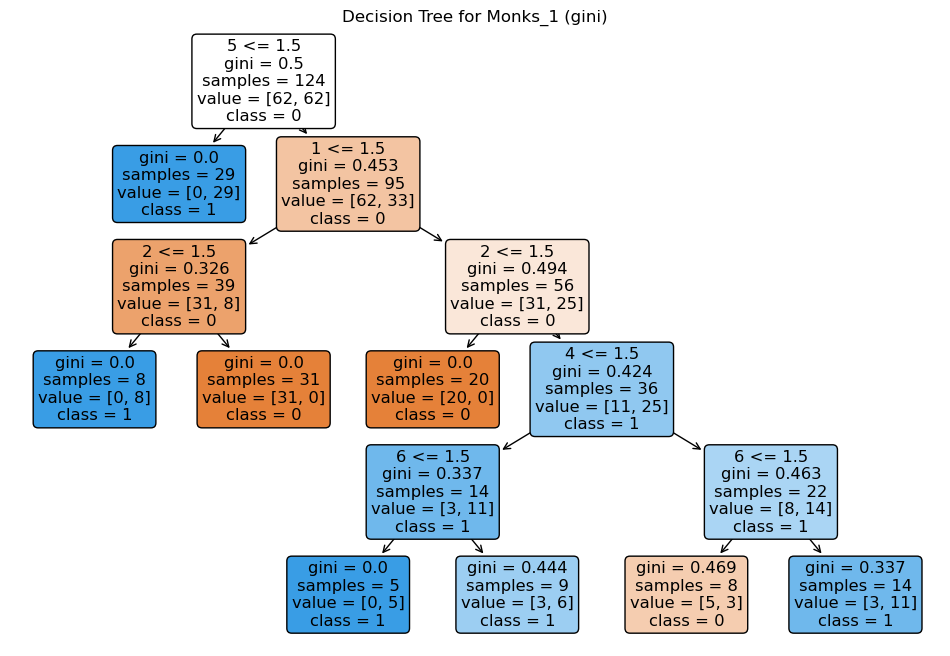

In [7]:
dt_1 =DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)
dt_1.fit(xt,yt)

ytt_p = dt_1.predict(xtt)

c_matrix = confusion_matrix(ytt,ytt_p)
temp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=dt_1.classes_)
temp.plot()
plt.title('Confusion Matrix for Monks_1 (gini)')
plt.show()

plt.figure(figsize=(12, 8))  # Adjust the size as needed
plot_tree(dt_1, filled=True, feature_names=xt.columns, class_names=[str(cls) for cls in dt_1.classes_], rounded=True)
plt.title('Decision Tree for Monks_1 (gini)')
plt.show()

Although different criterion (entropy and gini) were used for decision tree, the dataset led to identical tree structures. This condition happen because both criterions are try to maximize class purity in each seperation, and when the data is highly separable, both criterions will end up with most optimal solution. Therefore, both tree structures are same.